3250 Foundations of Data Science Jan-April 2020 <br>
Group 7 <br>
Member: Albert Mendoza <br>
Prof: Irina Sedenko

# Per-Capita Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleanedcombined.csv", index_col = "Country")
df

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,Region,Status
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.000120,0.000296,0.000303,0.000375,0.000582,0.002848,0.004226,0.006385,0.007127,...,0.008456,0.006210,0.005822,0.005469,0.004511,0.003270,0.003610,NaN,Asia,Developing regions
Albania,NaN,0.000037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000033,0.000065,0.000064,...,0.021376,0.020828,0.020889,0.020967,0.012482,0.007969,0.015839,NaN,Europe,Developed regions
Algeria,NaN,0.000416,0.000338,0.000347,0.000327,0.000289,0.000196,0.000299,0.000555,0.000990,...,0.010095,0.011355,0.012879,0.014335,0.006086,0.004842,0.007909,NaN,Africa,Developing regions
American Samoa,NaN,0.000000,0.002967,0.000000,0.000000,0.000000,0.000000,0.000000,0.002340,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001794,0.000000,0.000000,NaN,Oceania,Developing regions
Andorra,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004300,0.000000,0.000000,...,0.001213,0.001238,0.000631,0.000000,0.000000,0.001299,0.001299,NaN,Europe,Developed regions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,NaN,0.000678,0.000750,0.001086,0.000754,0.000841,0.000953,0.001007,0.001256,0.001492,...,0.004676,0.003431,0.004337,0.005266,0.002386,0.002001,0.004423,NaN,Latin America and the Caribbean,Developing regions
Vietnam,NaN,0.002194,0.003294,0.003805,0.005854,0.012742,0.009700,0.004400,0.002207,0.002167,...,0.001928,0.002327,0.002219,0.002114,0.001242,0.000856,0.001852,NaN,Asia,Developing regions
Yemen,NaN,0.000013,0.000024,0.000012,0.000068,0.000000,0.000188,0.000070,0.000116,0.000065,...,0.000711,0.000863,0.000771,0.000683,0.000423,0.000287,0.000758,NaN,Asia,Developing regions


In [3]:
#drop 2019, cause no data for 2019 world population on the dataset
df = df.drop(["2019","1979"],axis = 1)
df.info

<bound method DataFrame.info of                     1980      1981      1982      1983      1984      1985  \
Country                                                                      
Afghanistan     0.000120  0.000296  0.000303  0.000375  0.000582  0.002848   
Albania         0.000037  0.000000  0.000000  0.000000  0.000000  0.000000   
Algeria         0.000416  0.000338  0.000347  0.000327  0.000289  0.000196   
American Samoa  0.000000  0.002967  0.000000  0.000000  0.000000  0.000000   
Andorra         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...                  ...       ...       ...       ...       ...       ...   
Venezuela       0.000678  0.000750  0.001086  0.000754  0.000841  0.000953   
Vietnam         0.002194  0.003294  0.003805  0.005854  0.012742  0.009700   
Yemen           0.000013  0.000024  0.000012  0.000068  0.000000  0.000188   
Zambia          0.000188  0.000281  0.000176  0.000108  0.000239  0.000130   
Zimbabwe        0.000972  0.0014

In [4]:
#check null countries
dfnull = df.isnull().any(axis = 1)
dfnullonly = dfnull[dfnull == True]
dfnullonly

Country
Samoan    True
dtype: bool

In [5]:
#dropped all 4 countries above
dfdroppedna = df.dropna(how='any',axis=0)
dfdroppednan = dfdroppedna.drop("Region", axis = 1)
dfdroppednan

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Status
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000120,0.000296,0.000303,0.000375,0.000582,0.002848,0.004226,0.006385,0.007127,0.009066,...,0.006024,0.007315,0.008456,0.006210,0.005822,0.005469,0.004511,0.003270,0.003610,Developing regions
Albania,0.000037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000033,0.000065,0.000064,0.000093,...,0.019258,0.018553,0.021376,0.020828,0.020889,0.020967,0.012482,0.007969,0.015839,Developed regions
Algeria,0.000416,0.000338,0.000347,0.000327,0.000289,0.000196,0.000299,0.000555,0.000990,0.001729,...,0.013208,0.011797,0.010095,0.011355,0.012879,0.014335,0.006086,0.004842,0.007909,Developing regions
American Samoa,0.000000,0.002967,0.000000,0.000000,0.000000,0.000000,0.000000,0.002340,0.000000,0.002179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001794,0.000000,0.000000,Developing regions
Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004300,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001213,0.001238,0.000631,0.000000,0.000000,0.001299,0.001299,Developed regions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.000678,0.000750,0.001086,0.000754,0.000841,0.000953,0.001007,0.001256,0.001492,0.001586,...,0.003509,0.005026,0.004676,0.003431,0.004337,0.005266,0.002386,0.002001,0.004423,Developing regions
Vietnam,0.002194,0.003294,0.003805,0.005854,0.012742,0.009700,0.004400,0.002207,0.002167,0.004514,...,0.002208,0.001939,0.001928,0.002327,0.002219,0.002114,0.001242,0.000856,0.001852,Developing regions
Yemen,0.000013,0.000024,0.000012,0.000068,0.000000,0.000188,0.000070,0.000116,0.000065,0.000161,...,0.000911,0.000672,0.000711,0.000863,0.000771,0.000683,0.000423,0.000287,0.000758,Developing regions


In [6]:
#check if there is inf and replace with nan then dropna

newdf = dfdroppednan.replace([np.inf, -np.inf], np.nan).dropna(how="any", axis = 0)
newdf

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Status
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000120,0.000296,0.000303,0.000375,0.000582,0.002848,0.004226,0.006385,0.007127,0.009066,...,0.006024,0.007315,0.008456,0.006210,0.005822,0.005469,0.004511,0.003270,0.003610,Developing regions
Albania,0.000037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000033,0.000065,0.000064,0.000093,...,0.019258,0.018553,0.021376,0.020828,0.020889,0.020967,0.012482,0.007969,0.015839,Developed regions
Algeria,0.000416,0.000338,0.000347,0.000327,0.000289,0.000196,0.000299,0.000555,0.000990,0.001729,...,0.013208,0.011797,0.010095,0.011355,0.012879,0.014335,0.006086,0.004842,0.007909,Developing regions
American Samoa,0.000000,0.002967,0.000000,0.000000,0.000000,0.000000,0.000000,0.002340,0.000000,0.002179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001794,0.000000,0.000000,Developing regions
Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004300,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001213,0.001238,0.000631,0.000000,0.000000,0.001299,0.001299,Developed regions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.000678,0.000750,0.001086,0.000754,0.000841,0.000953,0.001007,0.001256,0.001492,0.001586,...,0.003509,0.005026,0.004676,0.003431,0.004337,0.005266,0.002386,0.002001,0.004423,Developing regions
Vietnam,0.002194,0.003294,0.003805,0.005854,0.012742,0.009700,0.004400,0.002207,0.002167,0.004514,...,0.002208,0.001939,0.001928,0.002327,0.002219,0.002114,0.001242,0.000856,0.001852,Developing regions
Yemen,0.000013,0.000024,0.000012,0.000068,0.000000,0.000188,0.000070,0.000116,0.000065,0.000161,...,0.000911,0.000672,0.000711,0.000863,0.000771,0.000683,0.000423,0.000287,0.000758,Developing regions


# Make Descriptive inferences on status per country

## Groupby - Status

- Immigration standardized per capita based on the Status of the country
  

Text(0.5, 1.0, 'Mean Population per Capita of New Canadian Citizens by Status of Original Country')

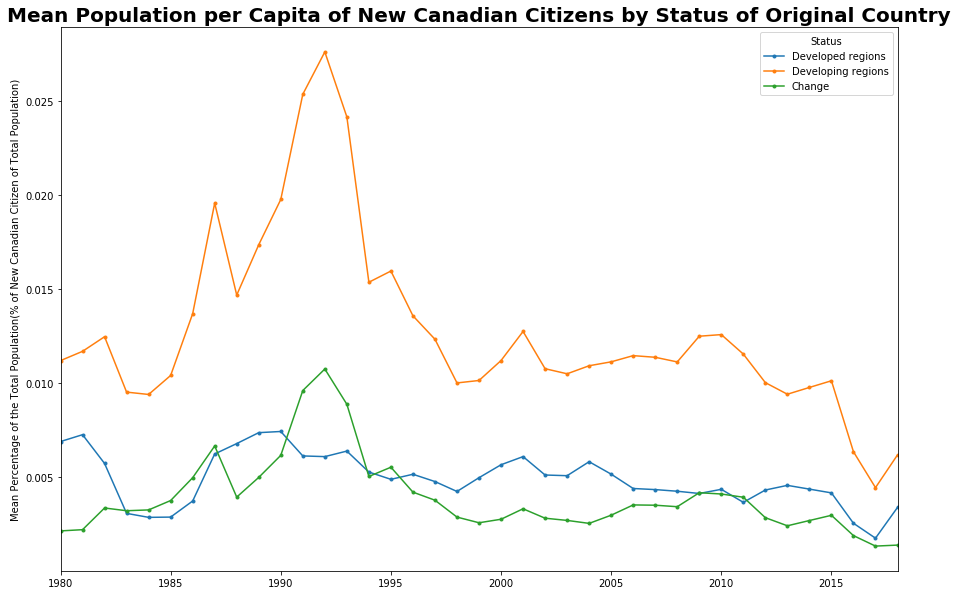

In [19]:
# Mean immigrants per country based on the Status of the Original Country of Origin
dfgrouped = newdf.groupby(["Status"]).mean()
dfgroupsum = dfgrouped.pivot_table(columns = "Status")
dfgroupsum["Change"] = (dfgroupsum["Developing regions"] - dfgroupsum["Developed regions"])/2
ax = dfgroupsum.plot(figsize=(15,10), marker = ".", title = "Mean Population per Capita of New Canadian Citizens by Status of Original Country")
ax.set_ylabel("Mean Percentage of the Total Population(% of New Canadian Citizen of Total Population)")
ax.set_title("Mean Population per Capita of New Canadian Citizens by Status of Original Country", fontdict={'fontsize': 20, 'fontweight': 'heavy'} )

In [8]:
dfgroupsum

Status,Developed regions,Developing regions,Change
1980,0.006896,0.011195,0.002149
1981,0.007260,0.011688,0.002214
1982,0.005732,0.012465,0.003366
1983,0.003080,0.009522,0.003221
1984,0.002869,0.009397,0.003264
1985,0.002883,0.010406,0.003762
1986,0.003737,0.013688,0.004975
1987,0.006236,0.019560,0.006662
1988,0.006788,0.014677,0.003945
1989,0.007369,0.017352,0.004992


### Assess Mean per country

In [9]:
#Drop Status column and transpose
dfdropped = newdf.drop("Status", axis = 1)
dftransposed = dfdropped.transpose()
dftransposed

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1980,0.000120,0.000037,0.000416,0.000000,0.000000,0.000012,0.000000,0.001319,0.000000,0.004778,...,0.039146,0.003425,0.004127,0.004390,0.000000,0.000678,0.002194,0.000013,0.000188,0.000972
1981,0.000296,0.000000,0.000338,0.002967,0.000000,0.000035,0.000000,0.001503,0.000000,0.004281,...,0.044016,0.004351,0.004371,0.004498,0.000000,0.000750,0.003294,0.000024,0.000281,0.001485
1982,0.000303,0.000000,0.000347,0.000000,0.000000,0.000067,0.000000,0.002174,0.000000,0.003189,...,0.036616,0.003149,0.003917,0.004943,0.000000,0.001086,0.003805,0.000012,0.000176,0.001282
1983,0.000375,0.000000,0.000327,0.000000,0.000000,0.000065,0.000000,0.000824,0.000000,0.002063,...,0.017778,0.002330,0.003037,0.003532,0.000000,0.000754,0.005854,0.000068,0.000108,0.000533
1984,0.000582,0.000000,0.000289,0.000000,0.000000,0.000042,0.067977,0.000797,0.000000,0.002039,...,0.018025,0.002254,0.002825,0.003008,0.000000,0.000841,0.012742,0.000000,0.000239,0.000374
1985,0.002848,0.000000,0.000196,0.000000,0.000000,0.000030,0.084161,0.000649,0.000000,0.002024,...,0.016912,0.002126,0.002750,0.003055,0.000000,0.000953,0.009700,0.000188,0.000130,0.000327
1986,0.004226,0.000033,0.000299,0.000000,0.004300,0.000048,0.082586,0.000694,0.000000,0.002222,...,0.016707,0.001807,0.002946,0.004520,0.000000,0.001007,0.004400,0.000070,0.000210,0.000467
1987,0.006385,0.000065,0.000555,0.002340,0.000000,0.000047,0.098838,0.001664,0.000000,0.002871,...,0.037564,0.002342,0.003180,0.008821,0.000000,0.001256,0.002207,0.000116,0.000312,0.000714
1988,0.007127,0.000064,0.000990,0.000000,0.000000,0.000099,0.055042,0.001181,0.000000,0.002480,...,0.048059,0.002247,0.002646,0.003226,0.000000,0.001492,0.002167,0.000065,0.000579,0.001005
1989,0.009066,0.000093,0.001729,0.002179,0.000000,0.000052,0.082247,0.001674,0.000000,0.003289,...,0.041690,0.002712,0.002751,0.004662,0.000000,0.001586,0.004514,0.000161,0.000870,0.001842


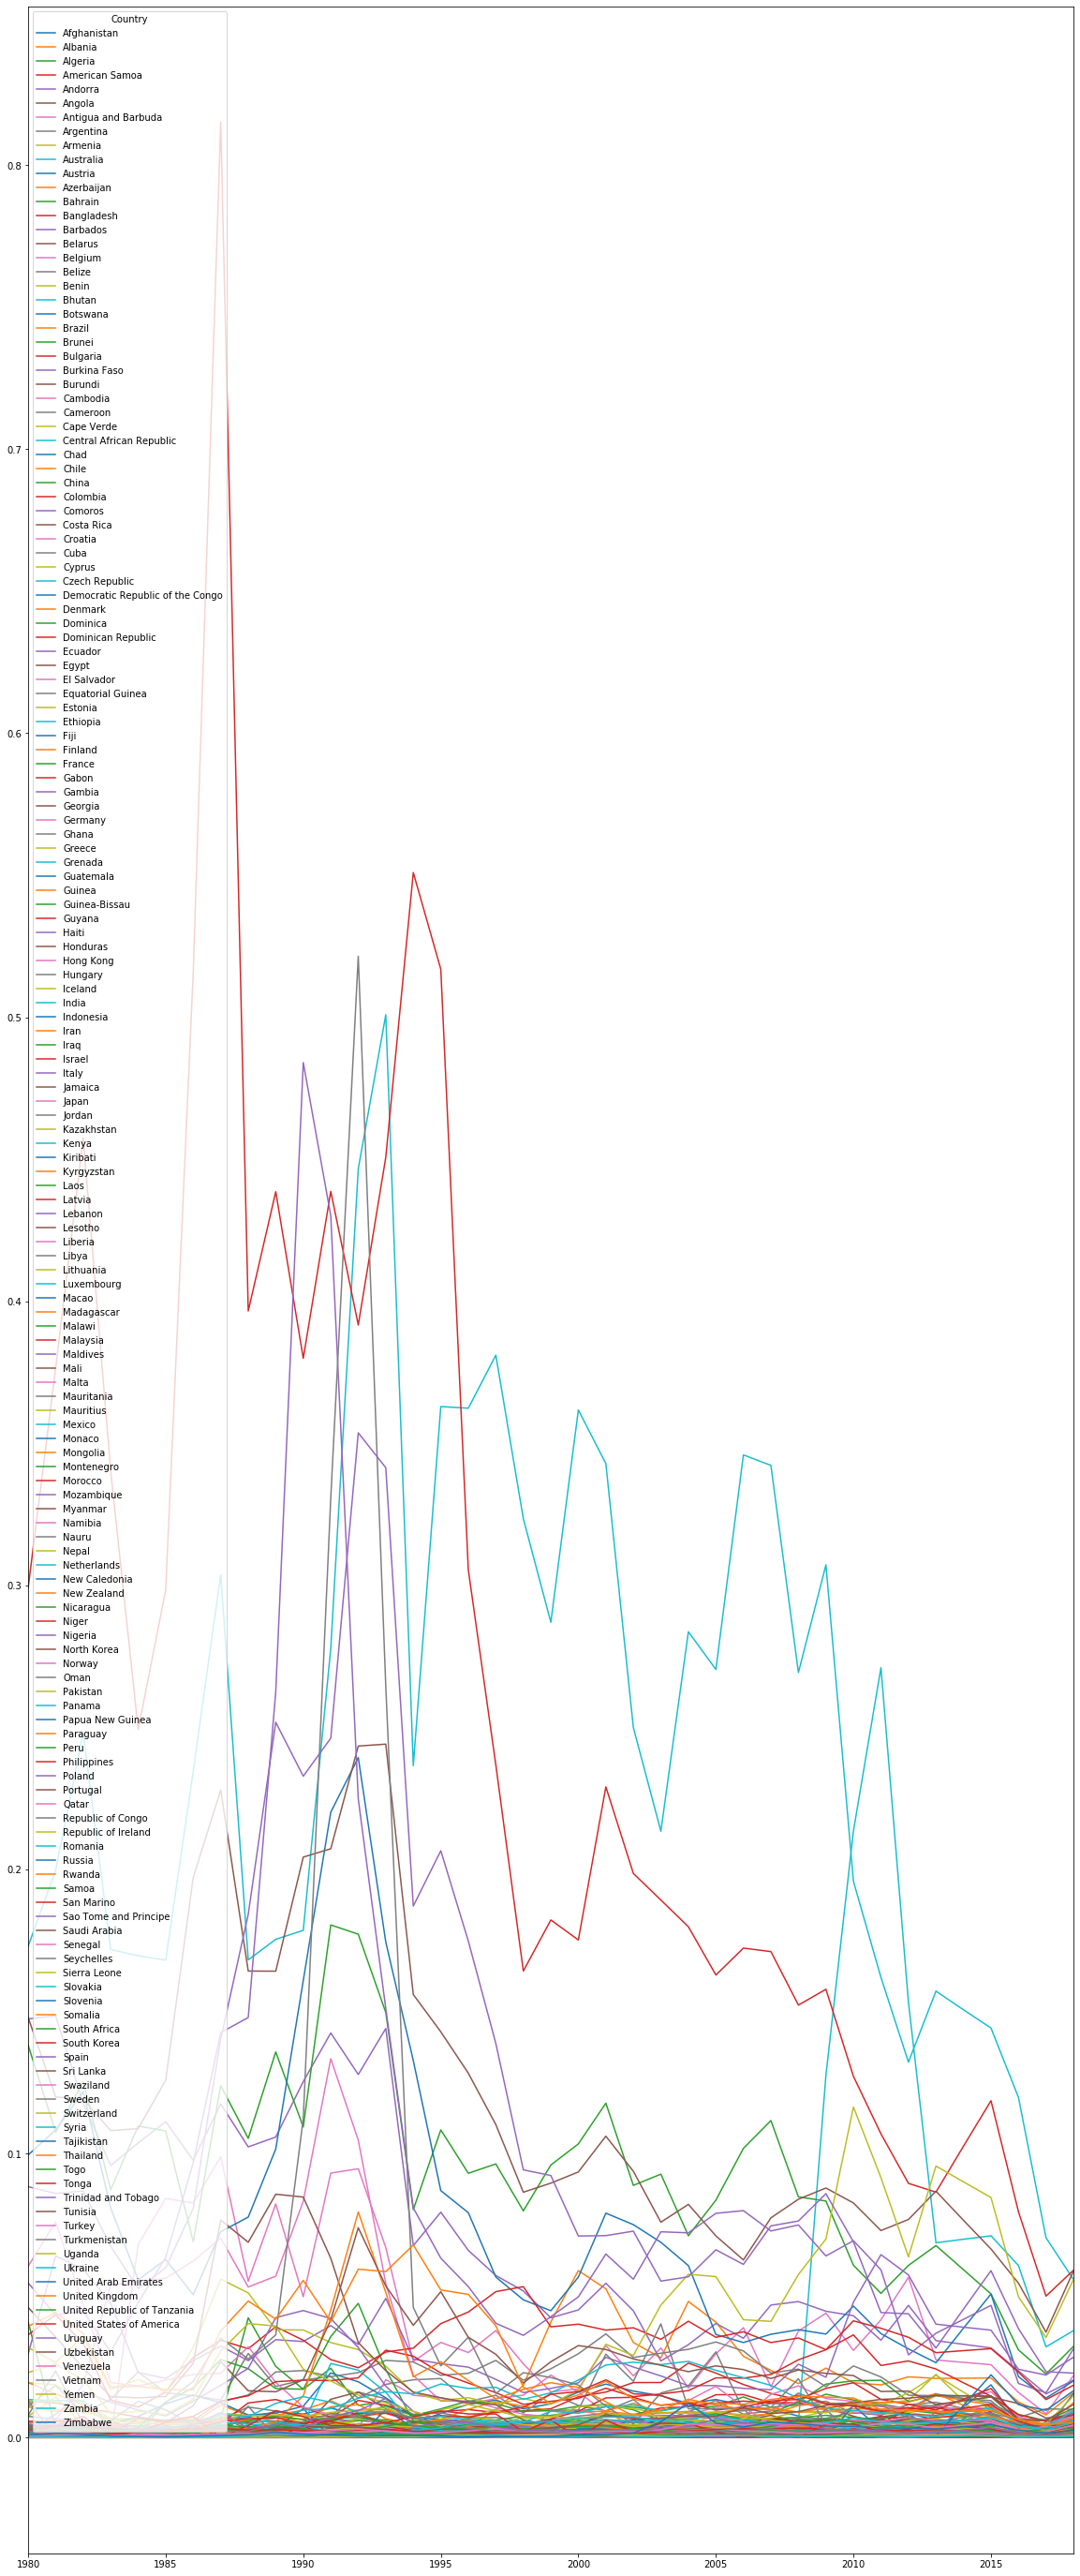

In [10]:
#make float and then plot
dftransposed.astype(float).plot(figsize=(20,50))


In [11]:
dfdropped["Mean"] = dfdropped.mean()

## Get mean immigration Per capita on every country

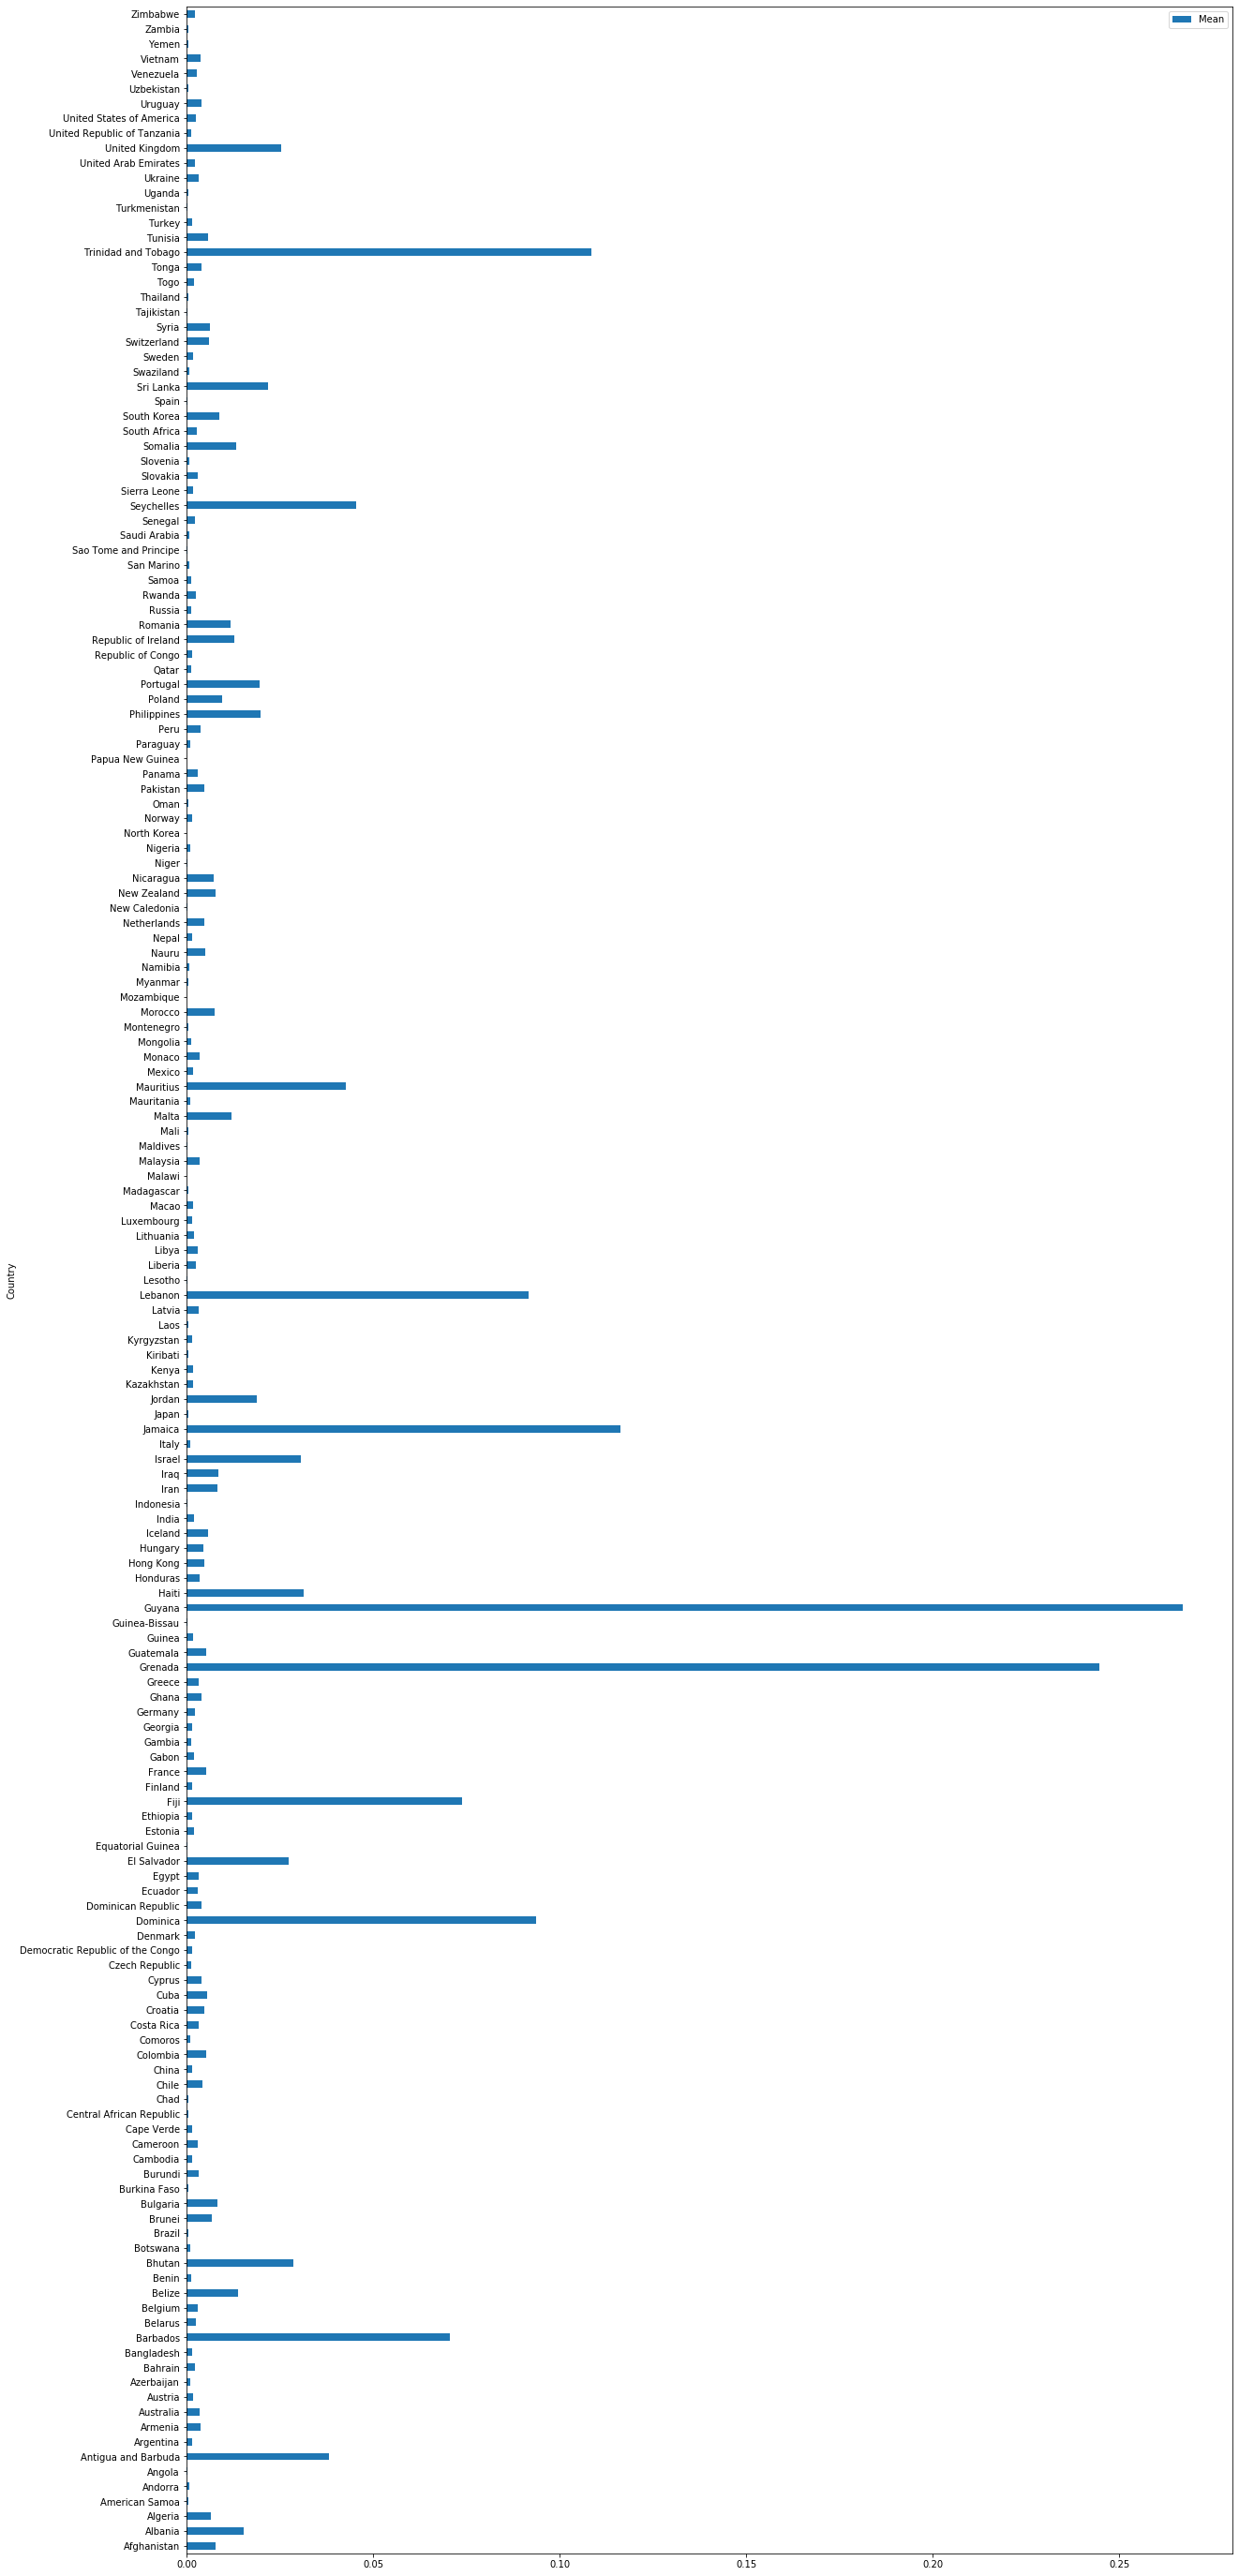

In [12]:

droppeddf = newdf.drop("Status", axis = 1)
droppeddf["Mean"] = droppeddf.mean(axis = 1)
meanonlydf = droppeddf.drop(droppeddf.iloc[:, 0:39], axis = 1)
meanonlydf.plot(kind = "barh", figsize=(20,50))

Text(0.5, 0, 'Country')

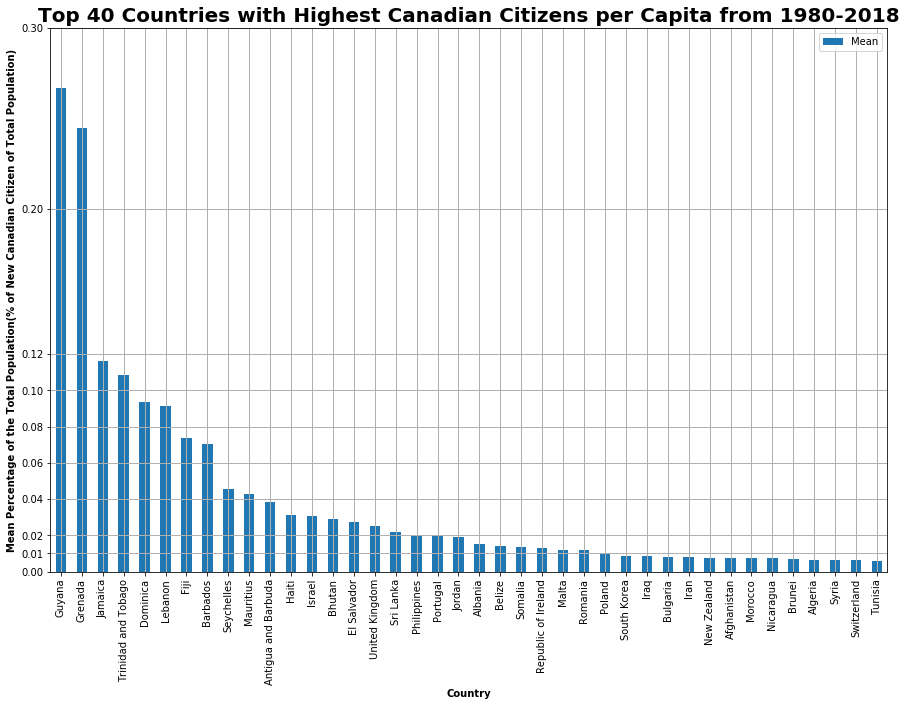

In [22]:
#Top 20 Countries with Highest Mean per capita became canadian citizen from 1980-2019

yticks = (0.00,0.01,0.02,0.04,0.06,0.08,0.10,0.12,0.20,0.30)
ax2 = meanonlydf.nlargest(40, "Mean").plot(kind="bar", figsize=(15,10), yticks = (yticks))
ax2.grid(linewidth=1)
ax2.set_title ("Top 40 Countries with Highest Canadian Citizens per Capita from 1980-2018", fontdict={'fontsize': 20, 'fontweight': 'heavy'})
ax2.set_ylabel("Mean Percentage of the Total Population(% of New Canadian Citizen of Total Population)", fontweight = "bold")
ax2.set_xlabel("Country", fontweight = "bold")

End of the Line
